# Here, we have applied the Rational Function Approximation

Ration Function Approximation method for Absorbing Boundary Conditions. 


Details regarding this conditions is well generalized in our Report. 

The method was developed by J.-P. Kuska in there research paper titled,

**Absorbing boundary conditions for the Schrodinger equation on finite intervals**


In [20]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.sparse import diags, linalg
import scipy.sparse.linalg as splin
plt.style.use('seaborn')

In [21]:
#defining the values so as to impliment in Crank Nikolson method

J = 1024                                                 #number of grid points
m = 0.5                                   #mass of the particle is set to 0.5 units, through the calculations
xmin, xmax      =  -10. , 10.                                  # x domain 
t0  , tend      =    0 , 2.0                                  # time period
centre , k0, sigma   =  0 , 7. ,1                           # parameters for the gaussian 
E               =   k0**2                                   # particle energy
dt              =   0.001                                      # time step
q               =   2*k0                        #q is the parameter for absorbing boundary condition
w               =   0.2                     #w is another parameter for p = 4 aborbing boundary codnition 

x_Range, dx  = np.linspace(xmin,xmax,J,retstep=True)     # x-array and calculation of x step    
t      = np.arange(t0, tend + dt, dt)  
N = len(t)                                         #number of points in time array
len(x_Range)                                              #length of array x must be qual to J

1024

In [22]:
#defining a guassian wave packet, for keeping this as the initial wave function

def Gaussian_Function(x_Range,centre,k0,sigma):         
    S = 1/(sigma**2*np.pi)**(1./4.)
    A = k0*x_Range
    B = (x_Range - centre)**2/(2*sigma**2)
    exp = np.exp(1j*A - B)
    return S*exp

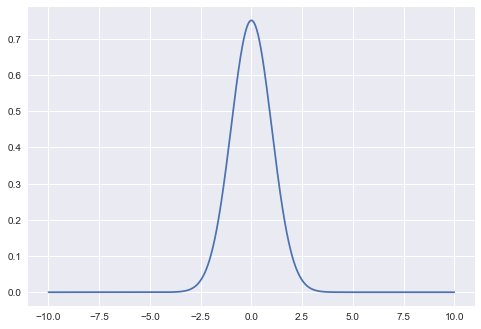

In [23]:
RFA_psi0   = Gaussian_Function(x_Range,centre,k0,sigma)      #Initializing the eave packet
plt.plot(x_Range, np.absolute(RFA_psi0))

In [24]:
J = len(x_Range)
N  = len(t)

RFA_PSI = np.zeros((J,N),complex)                   #Generating the 2D Array of complete wave function
RFA_PSI[:,0] = RFA_psi0                                 #Initializing the wave function at time t = 0


In [25]:
#Substitting the potential Value

V   = np.zeros(len(x_Range))    #Length of potential array must match with the length of x (grid points)

In [26]:
#lets first define what are a, b, c, d, and initialize some of the more variables. 


a = 3j*k0/(2*dt)
b = 3j*(k0**2)/(2*dx)
c = (k0**3)/4
d = 1/(dt*dx)
k0 = 2.999999

In [27]:
d = 1/(dt*dx)
    
RFA_zeta1_0 = ( -1j*(3*(k0)**2)/(2*dx) - 1j*3*k0/(2*dt) + d + (V[0] - k0**3)/4 )
RFA_zeta1_J = ( -1j*(3*(k0)**2)/(2*dx) - 1j*3*k0/(2*dt) + d + (V[-1] - k0**3)/4 )
RFA_zeta2_0 = (  1j*(3*(k0)**2)/(2*dx) - 1j*3*k0/(2*dt) - d + (V[0] - k0**3)/4 )
RFA_zeta2_J = (  1j*(3*(k0)**2)/(2*dx) - 1j*3*k0/(2*dt) - d + (V[-1] - k0**3)/4 )
RFA_zeta3_0 = (  1j*(3*(k0)**2)/(2*dx) - 1j*3*k0/(2*dt) + d +(V[0] - k0**3)/4 )
RFA_zeta3_J = (  1j*(3*(k0)**2)/(2*dx) - 1j*3*k0/(2*dt) + d + (V[-1] - k0**3)/4 )
RFA_zeta4_0 = ( -1j*(3*(k0)**2)/(2*dx) - 1j*3*k0/(2*dt) - d + (V[0] - k0**3)/4 )
RFA_zeta4_J = ( -1j*(3*(k0)**2)/(2*dx) - 1j*3*k0/(2*dt) - d + (V[-1] - k0**3)/4 )

RFA_ZETA = np.array([[0,RFA_zeta1_0, RFA_zeta2_0, RFA_zeta3_0,RFA_zeta4_0],
                       [0,RFA_zeta1_J,RFA_zeta2_J,RFA_zeta3_J,RFA_zeta4_J]])
RFA_ZETA = np.transpose(RFA_ZETA)



RFA_zeta   = RFA_ZETA
RFA_zeta

array([[     0.           +0.j        ,      0.           +0.j        ],
       [ 51143.25000675-5190.52303965j,  51143.25000675-5190.52303965j],
       [-51156.74999325-3809.47396035j, -51156.74999325-3809.47396035j],
       [ 51143.25000675-3809.47396035j,  51143.25000675-3809.47396035j],
       [-51156.74999325-5190.52303965j, -51156.74999325-5190.52303965j]])

In [28]:
RFA_one     = np.ones((J),complex)
RFA_alpha   = (1j)*dt/(4*m*dx**2)               
RFA_xi    = RFA_one + 1j*dt/2*(1/(m*dx**2)*RFA_one + V)   
RFA_gamma   = RFA_one - 1j*dt/2*(1/(m*dx**2)*RFA_one + V)   

RFA_xi[0]  = RFA_zeta[1,0];                                                                                RFA_xi[J-1]   = RFA_zeta[1,-1]
RFA_gamma[0] = RFA_zeta[3,0];                                                                              RFA_gamma[J-1] = RFA_zeta[3,-1]
RFA_up1     = (-RFA_alpha)*np.copy(RFA_one) ;                                                              RFA_up2     = RFA_alpha*np.copy(RFA_one); 
RFA_up1[1]  = RFA_zeta[2,0]           ;                                                                    RFA_up2[1]  = RFA_zeta[4,0]
RFA_dn1     = (-RFA_alpha)*np.copy(RFA_one) ;                                                              RFA_dn2     = RFA_alpha*np.copy(RFA_one);
RFA_dn1[J-2]= RFA_zeta[2,-1]           ;                                                                   RFA_dn2[J-2]= RFA_zeta[4,-1]


RFA_vecs1 = np.array([RFA_dn1,RFA_xi,RFA_up1]) ;                                                           RFA_vecs2 = np.array([RFA_dn2,RFA_gamma,RFA_up2])
diags = np.array([-1,0,+1])


RFA_U1    = sparse.spdiags(RFA_vecs1,diags,J,J)
RFA_U1    = RFA_U1.tocsc()
RFA_U2    = sparse.spdiags(RFA_vecs2,diags,J,J)
RFA_U2    = RFA_U2.tocsc()

In [29]:
RFA_LU = splin.splu(RFA_U1)   

for n in range(0,N - 1):          
    b = RFA_U2.dot(RFA_PSI[:,n])           
    RFA_PSI[:,n + 1] = RFA_LU.solve(b)

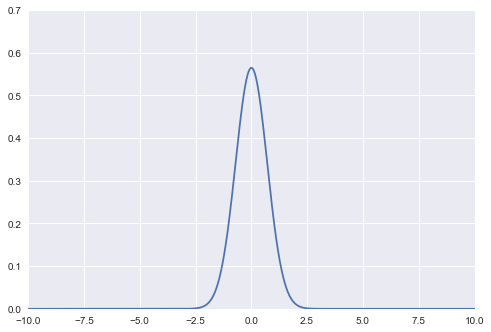

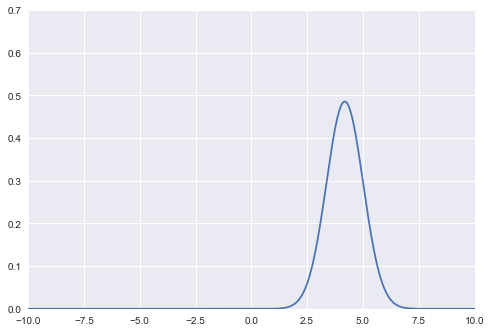

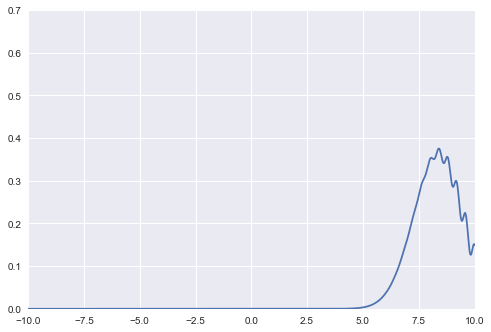

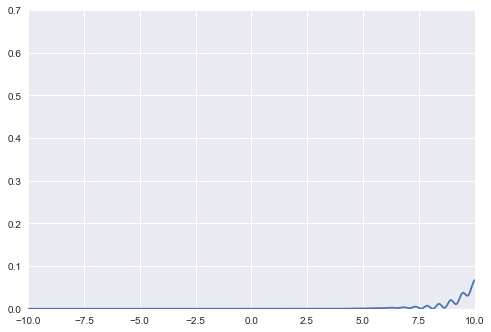

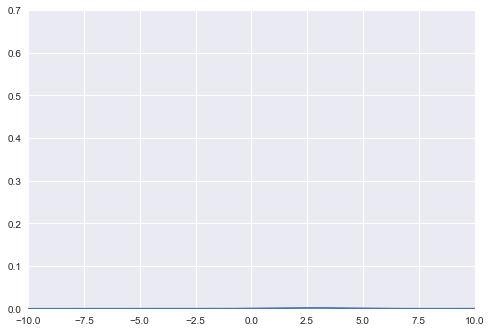

In [30]:
x_range = [-10, 10]
y_range = [0, 0.7]


for i in range(0, 1500, 300):
    
    plt.figure()
    plt.plot(x_Range, np.absolute(RFA_PSI[:, i])**2)
    
    plt.xlim(x_range)
    plt.ylim(y_range)
    
    
#The reflection vanished

In [31]:
#Generalizing this code for Rational Function Approximation, as similarly did for Linear Function

In [32]:
def RFA_ABC(V,dt,dx,m, k0):
    """
    The fucntions atke the inpur as, 
    
    V - Potential array, 
    dt
    dx, 
    mass which is fixed as 0.5
    and k0, parameter for Gaussian
    
    This computes the required elements for changing ABCs. 
    
    """
    d = 1/(dt*dx)
    RFA_zeta1_0 = ( -1j*(3*(k0)**2)/(2*dx) - 1j*3*k0/(2*dt) + d + (V[0] - k0**3)/4 )
    RFA_zeta1_J = ( -1j*(3*(k0)**2)/(2*dx) - 1j*3*k0/(2*dt) + d + (V[-1] - k0**3)/4 )
    RFA_zeta2_0 = (  1j*(3*(k0)**2)/(2*dx) - 1j*3*k0/(2*dt) - d + (V[0] - k0**3)/4 )
    RFA_zeta2_J = (  1j*(3*(k0)**2)/(2*dx) - 1j*3*k0/(2*dt) - d + (V[-1] - k0**3)/4 )
    RFA_zeta3_0 = (  1j*(3*(k0)**2)/(2*dx) - 1j*3*k0/(2*dt) + d +(V[0] - k0**3)/4 )
    RFA_zeta3_J = (  1j*(3*(k0)**2)/(2*dx) - 1j*3*k0/(2*dt) + d + (V[-1] - k0**3)/4 )
    RFA_zeta4_0 = ( -1j*(3*(k0)**2)/(2*dx) - 1j*3*k0/(2*dt) - d + (V[0] - k0**3)/4 )
    RFA_zeta4_J = ( -1j*(3*(k0)**2)/(2*dx) - 1j*3*k0/(2*dt) - d + (V[-1] - k0**3)/4 )

    RFA_ZETA = np.array([[0,RFA_zeta1_0, RFA_zeta2_0, RFA_zeta3_0,RFA_zeta4_0],
                       [0,RFA_zeta1_J,RFA_zeta2_J,RFA_zeta3_J,RFA_zeta4_J]])
    RFA_ZETA = np.transpose(RFA_ZETA)
    return RFA_ZETA



In [33]:
RFA_zeta = RFA_ABC(V, dt, dx, m, k0)
RFA_zeta

array([[     0.           +0.j        ,      0.           +0.j        ],
       [ 51143.25000675-5190.52303965j,  51143.25000675-5190.52303965j],
       [-51156.74999325-3809.47396035j, -51156.74999325-3809.47396035j],
       [ 51143.25000675-3809.47396035j,  51143.25000675-3809.47396035j],
       [-51156.74999325-5190.52303965j, -51156.74999325-5190.52303965j]])

In [34]:
def CN_RFA(J,V,RFA_zeta,dx,dt,m):
    """
    The function takes the input as, 
    J - length of array
    V - Potential array
    RFA_Zeta - ABC which is defined for Rational Functiuon Approximation
    dx - grid step
    dt - time step
    m - mass which is fixed in our case as 0.5
    
    """
    
    RFA_one     = np.ones((J),complex)
    RFA_alpha   = (1j)*dt/(4*m*dx**2)               
    RFA_xi    = RFA_one + 1j*dt/2*(1/(m*dx**2)*RFA_one + V)   
    RFA_gamma   = RFA_one - 1j*dt/2*(1/(m*dx**2)*RFA_one + V)   

    RFA_xi[0]  = RFA_zeta[1,0];                                                    RFA_xi[J-1]   = RFA_zeta[1,-1]
    RFA_gamma[0] = RFA_zeta[3,0];                                                  RFA_gamma[J-1] = RFA_zeta[3,-1]
    RFA_up1     = (-RFA_alpha)*np.copy(RFA_one) ;                                  RFA_up2     = RFA_alpha*np.copy(RFA_one); 
    RFA_up1[1]  = RFA_zeta[2,0]           ;                                        RFA_up2[1]  = RFA_zeta[4,0]
    RFA_dn1     = (-RFA_alpha)*np.copy(RFA_one) ;                                  RFA_dn2     = RFA_alpha*np.copy(RFA_one);
    RFA_dn1[J-2]= RFA_zeta[2,-1]           ;                                       RFA_dn2[J-2]= RFA_zeta[4,-1]


    RFA_vecs1 = np.array([RFA_dn1,RFA_xi,RFA_up1]) ;                    RFA_vecs2 = np.array([RFA_dn2,RFA_gamma,RFA_up2])
    diags = np.array([-1,0,+1])


    RFA_U1    = sparse.spdiags(RFA_vecs1,diags,J,J)
    RFA_U1    = RFA_U1.tocsc()
    RFA_U2    = sparse.spdiags(RFA_vecs2,diags,J,J)
    RFA_U2    = RFA_U2.tocsc()

    return RFA_U1, RFA_U2

In [35]:
RFA_U1, RFA_U2 = CN_RFA(J,V,RFA_zeta,dx,dt,m)

In [36]:
#defining the code for solving the equation with Linear Approximation method

def RFA_CN_Solve(x_Range,dx,t,dt,LAM_psi0,V,m):
    """
    This fucntion solve the schrodinger wave equation for Linear Approximation method, knowing the fucntions, CM_LAM, 
    and LAM_ZETA
    
    This requires the input, 
    
    """
    J = len(x_Range)
    N = len(t)
    
    RFA_PSI      = np.zeros((J,N),complex)
    RFA_PSI[:,0] = RFA_psi0
    
    RFA_zeta   = RFA_ABC(V,dt,dx,m, k0)
    RFA_U1, RFA_U2 = CN_RFA(J,V,RFA_zeta,dx,dt,m)
    
    RFA_LU = splin.splu(RFA_U1)   
    
    for n in range(0,N - 1):          
        b = RFA_U2.dot(RFA_PSI[:,n])           
        RFA_PSI[:,n + 1] = RFA_LU.solve(b)
        
    return RFA_PSI

In [37]:
RFA_PSI = RFA_CN_Solve(x_Range,dx,t,dt,RFA_psi0,V,m)

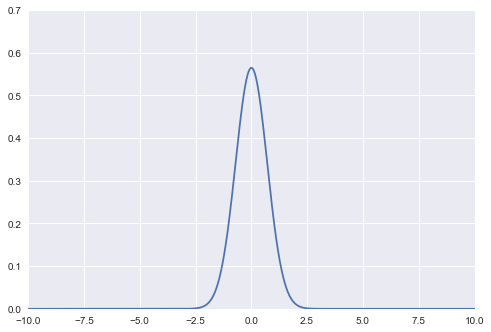

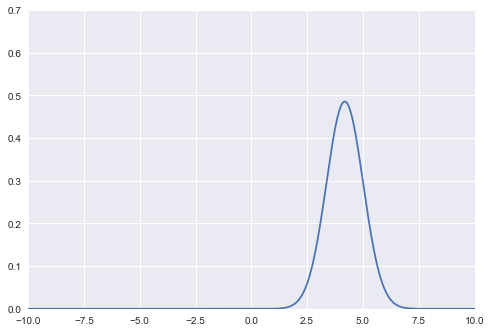

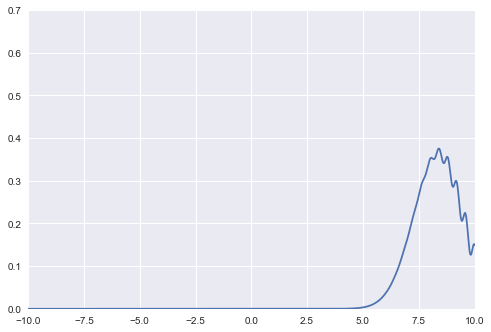

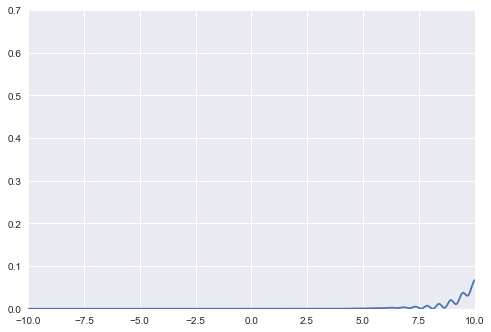

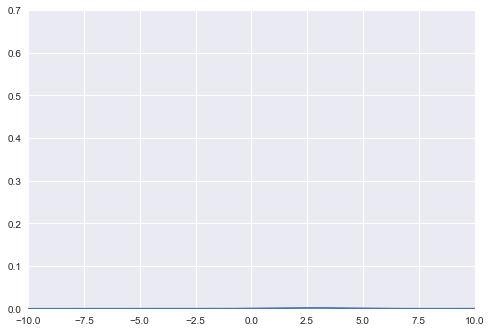

In [38]:
x_range = [-10, 10]
y_range = [0, 0.7]


for i in range(0, 1500, 300):
    
    plt.figure()
    plt.plot(x_Range, np.absolute(RFA_PSI[:, i])**2)
    
    plt.xlim(x_range)
    plt.ylim(y_range)
    
    
#The reflection vanished to much extent